In [3]:
import numpy as np 
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# Loading the Data

In [4]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Data Analysis

In [7]:
df.profile_report()

In [8]:
df['Gender']= pd.get_dummies(df['Gender'])

In [9]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
5,6,1,22,17,76
6,7,1,35,18,6
7,8,1,23,18,94
8,9,0,64,19,3
9,10,1,30,19,72


array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>],
       [<AxesSubplot:title={'center':'Spending Score (1-100)'}>,
        <AxesSubplot:>]], dtype=object)

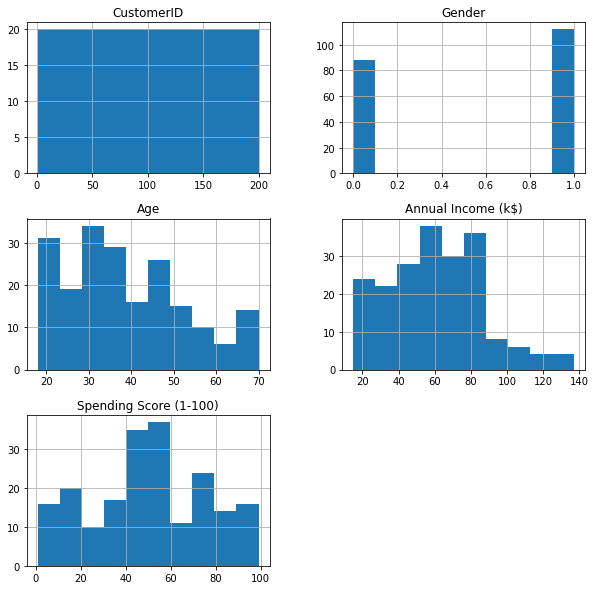

In [10]:
df.hist(figsize=(10,10))

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

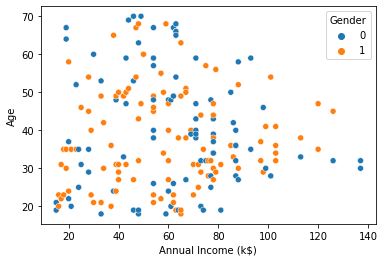

In [11]:
sns.scatterplot(x= df['Annual Income (k$)'], y= df['Age'], hue=df['Gender'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

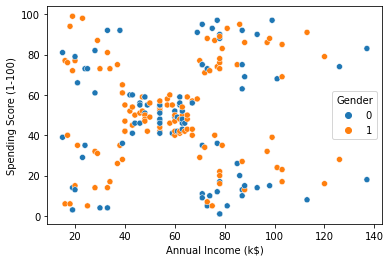

In [12]:
sns.scatterplot(x= df['Annual Income (k$)'], y= df['Spending Score (1-100)'], hue=df['Gender'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

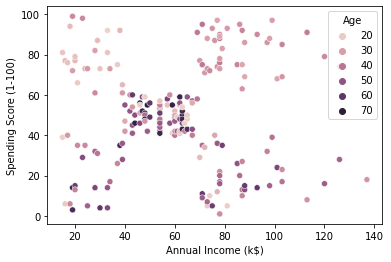

In [13]:
sns.scatterplot(x= df['Annual Income (k$)'], y= df['Spending Score (1-100)'], hue=df['Age'])

# Observations:
* Female footfall is more than male footfall in the mall
* Age Group 20-25 and 30-40 are most spotted in mall
* Most shoppers have annual income 60-80k
* Most of the shoppers with Spending score 40-60 have an annual income of 40-60k
* People with lower income tend to have spending score
* Age Group 20-30 have the highest spending scores

In [14]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


# Preprocessing the Data

In [15]:
num_cols= ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']

norm= normalize(df[num_cols])
df_scaled= pd.DataFrame(norm, columns= num_cols)
df_scaled.head()
             

,Annual Income (k$),Spending Score (1-100),Age
0,0.326783,0.849635,0.413925
1,0.176446,0.952809,0.247025
2,0.608229,0.228086,0.760286
3,0.195267,0.939723,0.280697
4,0.318439,0.749269,0.580683


In [16]:
df_scaled['Gender']= df['Gender']

In [17]:
df_scaled

,Annual Income (k$),Spending Score (1-100),Age,Gender
0,0.326783,0.849635,0.413925,0
1,0.176446,0.952809,0.247025,0
2,0.608229,0.228086,0.760286,1
3,0.195267,0.939723,0.280697,1
4,0.318439,0.749269,0.580683,1
...,...,...,...,...
195,0.811515,0.534247,0.236692,1
196,0.921773,0.204838,0.329205,1
197,0.842324,0.494698,0.213924,0
198,0.965915,0.126909,0.225615,0


# Hierarchical Clustering

In [18]:
dmatrix= linkage(df_scaled[['Age',  'Spending Score (1-100)','Annual Income (k$)' ]], method= 'complete', metric= 'euclidean')


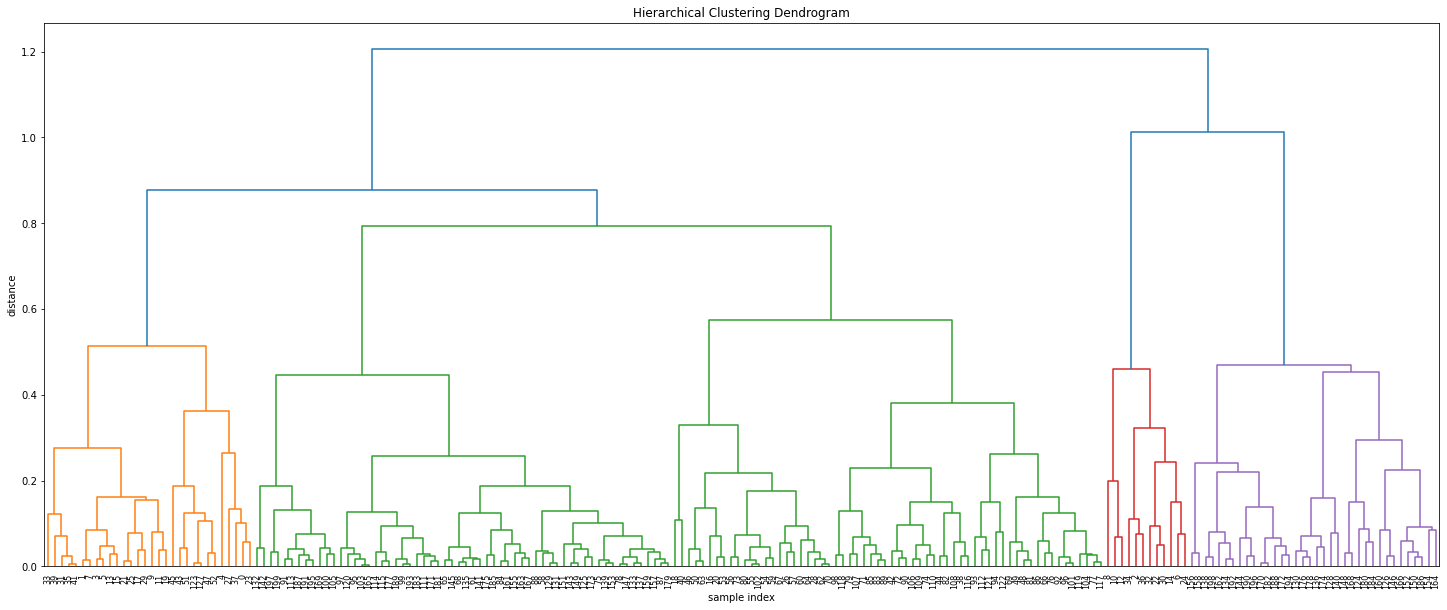

In [19]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    dmatrix,
    leaf_font_size=8, 
)
plt.show()

# K-Means Clustering

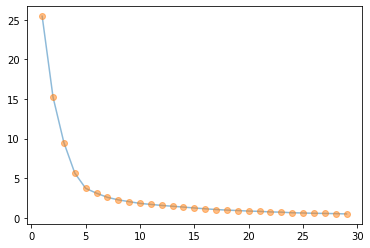

In [20]:
distortions= []
for i in range(1,30):
    kmeans= KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001,random_state= 100, algorithm= 'full')
    kmeans.fit(df_scaled[num_cols])
    distortions.append(kmeans.inertia_)
    
plt.plot(np.arange(1,30,1), distortions,  alpha= 0.5)       
plt.plot(np.arange(1,30,1), distortions,'o',  alpha= 0.5)    
plt.show()


In [21]:
df_scaled

,Annual Income (k$),Spending Score (1-100),Age,Gender
0,0.326783,0.849635,0.413925,0
1,0.176446,0.952809,0.247025,0
2,0.608229,0.228086,0.760286,1
3,0.195267,0.939723,0.280697,1
4,0.318439,0.749269,0.580683,1
...,...,...,...,...
195,0.811515,0.534247,0.236692,1
196,0.921773,0.204838,0.329205,1
197,0.842324,0.494698,0.213924,0
198,0.965915,0.126909,0.225615,0


In [22]:
kmeans= KMeans(n_clusters=5,  init='k-means++', n_init=30, max_iter=300, tol=0.0001,random_state= 100, algorithm= 'full')
kmeans.fit(df_scaled[num_cols])
df_scaled['cluster_labels']= kmeans.labels_

In [23]:
df_scaled

,Annual Income (k$),Spending Score (1-100),Age,Gender,cluster_labels
0,0.326783,0.849635,0.413925,0,1
1,0.176446,0.952809,0.247025,0,1
2,0.608229,0.228086,0.760286,1,4
3,0.195267,0.939723,0.280697,1,1
4,0.318439,0.749269,0.580683,1,1
...,...,...,...,...,...
195,0.811515,0.534247,0.236692,1,2
196,0.921773,0.204838,0.329205,1,3
197,0.842324,0.494698,0.213924,0,2
198,0.965915,0.126909,0.225615,0,3


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

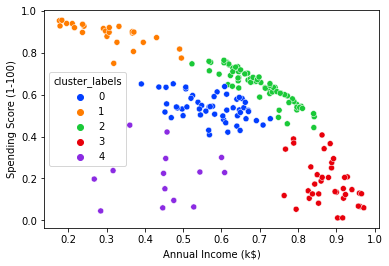

In [24]:
sns.scatterplot(x= 'Annual Income (k$)', y= 'Spending Score (1-100)', hue='cluster_labels', data= df_scaled, palette= 'bright')